# Libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from urad_Preprocessing import get_data_preprocessing
row = 14
time_prediction = row*3 #in days, it is equal to one week

Using TensorFlow backend.


# Function List ("Data splitting (training and testing)", "ANN", "LSTM", "convert_dataset")

Function List ("LSTM" and "dataset converter")

In [71]:
#Make the data into classification problem (up and down)
def subtract(x1, x0):
    return (x1 - x0) > 0

def regression_to_class(inp):
    len_input = len(inp)
    output = np.zeros_like(inp)
    for i in range(1,len_input): output[i] = subtract(inp[i], inp[i-1])
    #print(inp.shape, output.shape)
    return output 

In [45]:
#build LSTM model with return sequences
batch_size = 100
def build_model_LSTM(learning_rate, time_prediction):
    lstm_model = Sequential()
    lstm_model.add( LSTM(time_prediction*2, input_shape = ( 1, time_prediction-1), return_sequences = True) ) 
    lstm_model.add(Dropout(0.5))
    lstm_model.add( LSTM(time_prediction*1, return_sequences = True) )
    lstm_model.add(Dropout(0.5))
    lstm_model.add( LSTM(int(time_prediction/2)) )
    lstm_model.add(Dropout(0.5))
    lstm_model.add(Dense(1))
    adam = Adam(decay = learning_rate*-0.1, lr=learning_rate)
    lstm_model.compile(loss='mean_squared_error', optimizer = adam)
    return lstm_model

In [4]:
# convert an array of values into a dataset matrix
def convert_dataset(dataset, time_prediction, len_data):
    # look back default value is in day, it is equal to one week
    dataX, dataY = [], []
    for i in range(0, len_data-time_prediction+1, row):
        #if i > 7000: print(i)
        a = dataset[i:i+time_prediction-1]
        dataX.append(a)
        dataY.append(dataset[i + time_prediction-1])
    dataX = np.array(dataX).reshape(-1, 1, time_prediction-1)
    return dataX, np.array(dataY)

# Data Preprocessing (to make it into time-series)

Prepare the dataset

In [6]:
np.random.seed(5) #set pseudo checkpoint
get_data_preprocessing() #preprocess the raw data and get the important features
dataset = pd.read_csv("fb_ads_preprocess.csv", header=None)
len_data = len(dataset)
dataset = np.array(dataset).flatten().reshape(-1,1)
print(dataset.shape, len_data)

Files from the folder-fb ads/ that contains-22 files are succesfully loaded...
(510, 14)
Preprocessing is successful!
(7140, 1) 510


Data Splitting (for training and testing)

In [7]:
#Divide the data into training, and test data
datasetX, datasetY= convert_dataset(dataset, time_prediction, len_data*row)
print(datasetX.shape)

#prepare the dataset, and divide them into training and testing dataset
train_size = int(len_data * 0.8)
test_size = len_data - train_size
trainX, trainY, testX, testY =  datasetX[:train_size,:], datasetY[:train_size], \
                                datasetX[train_size:,:], datasetY[train_size:]
print(trainX.shape, testX.shape)

(508, 1, 41)
(408, 1, 41) (100, 1, 41)


# Validation

Do Validation and See its Performance 

In [21]:
#using the training data that will be divided again into 80% train, and 20% validation
lstm_model = build_model_LSTM(0.0001, time_prediction)
history = lstm_model.fit(trainX, trainY, epochs=1000, batch_size=batch_size, validation_split=0.2, shuffle=True)

Train on 326 samples, validate on 82 samples
Epoch 1/1000
326/326 [==============================] - 3s - loss: 0.0135 - val_loss: 0.0270
Epoch 2/1000
326/326 [==============================] - 0s - loss: 0.0133 - val_loss: 0.0265
Epoch 3/1000
326/326 [==============================] - 0s - loss: 0.0129 - val_loss: 0.0261
Epoch 4/1000
326/326 [==============================] - 0s - loss: 0.0127 - val_loss: 0.0257
Epoch 5/1000
326/326 [==============================] - 0s - loss: 0.0122 - val_loss: 0.0252
Epoch 6/1000
326/326 [==============================] - 0s - loss: 0.0122 - val_loss: 0.0248
Epoch 7/1000
326/326 [==============================] - 0s - loss: 0.0117 - val_loss: 0.0244
Epoch 8/1000
326/326 [==============================] - 0s - loss: 0.0114 - val_loss: 0.0240
Epoch 9/1000
326/326 [==============================] - 0s - loss: 0.0112 - val_loss: 0.0235
Epoch 10/1000
326/326 [==============================] - 0s - loss: 0.0111 - val_loss: 0.0231
Epoch 11/1000
326/326 [=

326/326 [==============================] - 0s - loss: 0.0038 - val_loss: 0.0076
Epoch 88/1000
326/326 [==============================] - 0s - loss: 0.0038 - val_loss: 0.0075
Epoch 89/1000
326/326 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0075
Epoch 90/1000
326/326 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0075
Epoch 91/1000
326/326 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0075
Epoch 92/1000
326/326 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0076
Epoch 93/1000
326/326 [==============================] - 0s - loss: 0.0038 - val_loss: 0.0075
Epoch 94/1000
326/326 [==============================] - 0s - loss: 0.0036 - val_loss: 0.0075
Epoch 95/1000
326/326 [==============================] - 0s - loss: 0.0039 - val_loss: 0.0075
Epoch 96/1000
326/326 [==============================] - 0s - loss: 0.0035 - val_loss: 0.0075
Epoch 97/1000
326/326 [==============================] - 0s - loss: 0.0037

326/326 [==============================] - 0s - loss: 0.0033 - val_loss: 0.0067
Epoch 174/1000
326/326 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0067
Epoch 175/1000
326/326 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0067
Epoch 176/1000
326/326 [==============================] - 0s - loss: 0.0034 - val_loss: 0.0067
Epoch 177/1000
326/326 [==============================] - 0s - loss: 0.0034 - val_loss: 0.0067
Epoch 178/1000
326/326 [==============================] - 0s - loss: 0.0035 - val_loss: 0.0067
Epoch 179/1000
326/326 [==============================] - 0s - loss: 0.0033 - val_loss: 0.0067
Epoch 180/1000
326/326 [==============================] - 0s - loss: 0.0033 - val_loss: 0.0067
Epoch 181/1000
326/326 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0067
Epoch 182/1000
326/326 [==============================] - 0s - loss: 0.0034 - val_loss: 0.0067
Epoch 183/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0031 - val_loss: 0.0062
Epoch 260/1000
326/326 [==============================] - 0s - loss: 0.0034 - val_loss: 0.0062
Epoch 261/1000
326/326 [==============================] - 0s - loss: 0.0031 - val_loss: 0.0062
Epoch 262/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0062
Epoch 263/1000
326/326 [==============================] - 0s - loss: 0.0031 - val_loss: 0.0061
Epoch 264/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0060
Epoch 265/1000
326/326 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0060
Epoch 266/1000
326/326 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0060
Epoch 267/1000
326/326 [==============================] - 0s - loss: 0.0032 - val_loss: 0.0060
Epoch 268/1000
326/326 [==============================] - 0s - loss: 0.0034 - val_loss: 0.0060
Epoch 269/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0054
Epoch 346/1000
326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0054
Epoch 347/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0054
Epoch 348/1000
326/326 [==============================] - 0s - loss: 0.0033 - val_loss: 0.0054
Epoch 349/1000
326/326 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0054
Epoch 350/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0054
Epoch 351/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0054
Epoch 352/1000
326/326 [==============================] - 0s - loss: 0.0031 - val_loss: 0.0054
Epoch 353/1000
326/326 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0054
Epoch 354/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0054
Epoch 355/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0046
Epoch 432/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0046
Epoch 433/1000
326/326 [==============================] - 0s - loss: 0.0030 - val_loss: 0.0046
Epoch 434/1000
326/326 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0046
Epoch 435/1000
326/326 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0046
Epoch 436/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0046
Epoch 437/1000
326/326 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0046
Epoch 438/1000
326/326 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0046
Epoch 439/1000
326/326 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0046
Epoch 440/1000
326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0046
Epoch 441/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0039
Epoch 518/1000
326/326 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0038
Epoch 519/1000
326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0038
Epoch 520/1000
326/326 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0038
Epoch 521/1000
326/326 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0037
Epoch 522/1000
326/326 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0038
Epoch 523/1000
326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0037
Epoch 524/1000
326/326 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0037
Epoch 525/1000
326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0038
Epoch 526/1000
326/326 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0038
Epoch 527/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0027
Epoch 604/1000
326/326 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0027
Epoch 605/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 606/1000
326/326 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0027
Epoch 607/1000
326/326 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0027
Epoch 608/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0027
Epoch 609/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 610/1000
326/326 [==============================] - 0s - loss: 0.0027 - val_loss: 0.0027
Epoch 611/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 612/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 613/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0021
Epoch 690/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0021
Epoch 691/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0021
Epoch 692/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0021
Epoch 693/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0021
Epoch 694/1000
326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0021
Epoch 695/1000
326/326 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0021
Epoch 696/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0021
Epoch 697/1000
326/326 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0021
Epoch 698/1000
326/326 [==============================] - 0s - loss: 0.0026 - val_loss: 0.0020
Epoch 699/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0016
Epoch 776/1000
326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0016
Epoch 777/1000
326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0016
Epoch 778/1000
326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0016
Epoch 779/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0016
Epoch 780/1000
326/326 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0016
Epoch 781/1000
326/326 [==============================] - 0s - loss: 0.0020 - val_loss: 0.0016
Epoch 782/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0016
Epoch 783/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0016
Epoch 784/1000
326/326 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0016
Epoch 785/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0014
Epoch 862/1000
326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0014
Epoch 863/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0014
Epoch 864/1000
326/326 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0014
Epoch 865/1000
326/326 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0014
Epoch 866/1000
326/326 [==============================] - 0s - loss: 0.0020 - val_loss: 0.0014
Epoch 867/1000
326/326 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0014
Epoch 868/1000
326/326 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0014
Epoch 869/1000
326/326 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0014
Epoch 870/1000
326/326 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0014
Epoch 871/1000
326/326 [==============================] - 0s - lo

326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0015
Epoch 948/1000
326/326 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0015
Epoch 949/1000
326/326 [==============================] - 0s - loss: 0.0025 - val_loss: 0.0015
Epoch 950/1000
326/326 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0015
Epoch 951/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0015
Epoch 952/1000
326/326 [==============================] - 0s - loss: 0.0022 - val_loss: 0.0015
Epoch 953/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0015
Epoch 954/1000
326/326 [==============================] - 0s - loss: 0.0023 - val_loss: 0.0015
Epoch 955/1000
326/326 [==============================] - 0s - loss: 0.0021 - val_loss: 0.0015
Epoch 956/1000
326/326 [==============================] - 0s - loss: 0.0020 - val_loss: 0.0015
Epoch 957/1000
326/326 [==============================] - 0s - lo

dict_keys(['loss', 'val_loss'])


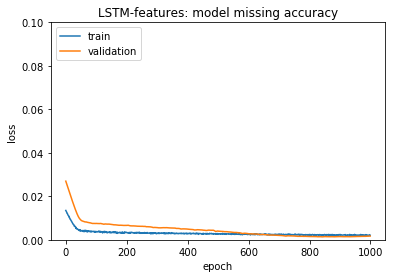

In [22]:
#plot training and validation loss using MSE 
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM-features: model missing accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((.0,0.1))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction

Do The Prediction and Re-Evaluate The Model Performance

In [55]:
lstm_model = build_model_LSTM(0.0001, time_prediction)
lstm_model.fit(trainX, trainY, epochs=1000, batch_size=batch_size)
train_predict = lstm_model.predict(trainX)
test_predict = lstm_model.predict(testX)

Epoch 1/1000
408/408 [==============================] - 3s - loss: 0.0161     
Epoch 2/1000
408/408 [==============================] - 0s - loss: 0.0158     
Epoch 3/1000
408/408 [==============================] - 0s - loss: 0.0153     
Epoch 4/1000
408/408 [==============================] - 0s - loss: 0.0149     
Epoch 5/1000
408/408 [==============================] - 0s - loss: 0.0145     
Epoch 6/1000
408/408 [==============================] - 0s - loss: 0.0141     
Epoch 7/1000
408/408 [==============================] - 0s - loss: 0.0138     
Epoch 8/1000
408/408 [==============================] - 0s - loss: 0.0133     
Epoch 9/1000
408/408 [==============================] - 0s - loss: 0.0130     
Epoch 10/1000
408/408 [==============================] - 0s - loss: 0.0124     
Epoch 11/1000
408/408 [==============================] - 0s - loss: 0.0122     
Epoch 12/1000
408/408 [==============================] - 0s - loss: 0.0118     
Epoch 13/1000
408/408 [==========================

408/408 [==============================] - 0s - loss: 0.0037     
Epoch 104/1000
408/408 [==============================] - 0s - loss: 0.0042     
Epoch 105/1000
408/408 [==============================] - 0s - loss: 0.0038     
Epoch 106/1000
408/408 [==============================] - 0s - loss: 0.0038     
Epoch 107/1000
408/408 [==============================] - 0s - loss: 0.0037     
Epoch 108/1000
408/408 [==============================] - 0s - loss: 0.0036     
Epoch 109/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 110/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 111/1000
408/408 [==============================] - 0s - loss: 0.0035     
Epoch 112/1000
408/408 [==============================] - 0s - loss: 0.0039     
Epoch 113/1000
408/408 [==============================] - 0s - loss: 0.0037     
Epoch 114/1000
408/408 [==============================] - 0s - loss: 0.0037     
Epoch 115/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0034     
Epoch 205/1000
408/408 [==============================] - 0s - loss: 0.0033     
Epoch 206/1000
408/408 [==============================] - 0s - loss: 0.0033     
Epoch 207/1000
408/408 [==============================] - 0s - loss: 0.0035     
Epoch 208/1000
408/408 [==============================] - 0s - loss: 0.0032     
Epoch 209/1000
408/408 [==============================] - 0s - loss: 0.0032     
Epoch 210/1000
408/408 [==============================] - 0s - loss: 0.0035     
Epoch 211/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 212/1000
408/408 [==============================] - 0s - loss: 0.0032     
Epoch 213/1000
408/408 [==============================] - 0s - loss: 0.0033     
Epoch 214/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 215/1000
408/408 [==============================] - 0s - loss: 0.0031     
Epoch 216/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0030     
Epoch 306/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 307/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 308/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 309/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 310/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 311/1000
408/408 [==============================] - 0s - loss: 0.0028     
Epoch 312/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 313/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 314/1000
408/408 [==============================] - 0s - loss: 0.0030     
Epoch 315/1000
408/408 [==============================] - 0s - loss: 0.0029     
Epoch 316/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 317/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0025     
Epoch 407/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 408/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 409/1000
408/408 [==============================] - 0s - loss: 0.0027     
Epoch 410/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 411/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 412/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 413/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 414/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 415/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 416/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 417/1000
408/408 [==============================] - 0s - loss: 0.0026     
Epoch 418/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0024     
Epoch 508/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 509/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 510/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 511/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 512/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 513/1000
408/408 [==============================] - 0s - loss: 0.0025     
Epoch 514/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 515/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 516/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 517/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 518/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 519/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0021     
Epoch 608/1000
408/408 [==============================] - 0s - loss: 0.0024     
Epoch 609/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 610/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 611/1000
408/408 [==============================] - 0s - loss: 0.0023        
Epoch 612/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 613/1000
408/408 [==============================] - 0s - loss: 0.0024        
Epoch 614/1000
408/408 [==============================] - 0s - loss: 0.0021        
Epoch 615/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 616/1000
408/408 [==============================] - 0s - loss: 0.0022        
Epoch 617/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 618/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 619/1000
408/408 [=======

408/408 [==============================] - 0s - loss: 0.0023     
Epoch 708/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 709/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 710/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 711/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 712/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 713/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 714/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 715/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 716/1000
408/408 [==============================] - 0s - loss: 0.0020     
Epoch 717/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 718/1000
408/408 [==============================] - 0s - loss: 0.0023     
Epoch 719/1000
408/408 [===================

408/408 [==============================] - 0s - loss: 0.0022        
Epoch 808/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 809/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 810/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 811/1000
408/408 [==============================] - 0s - loss: 0.0020        
Epoch 812/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 813/1000
408/408 [==============================] - 0s - loss: 0.0020     
Epoch 814/1000
408/408 [==============================] - 0s - loss: 0.0020        
Epoch 815/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 816/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 817/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 818/1000
408/408 [==============================] - 0s - loss: 0.0021        
Epoch 819/1000
408/408 [=======

408/408 [==============================] - 0s - loss: 0.0021        
Epoch 907/1000
408/408 [==============================] - 0s - loss: 0.0020        
Epoch 908/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 909/1000
408/408 [==============================] - 0s - loss: 0.0020     
Epoch 910/1000
408/408 [==============================] - 0s - loss: 0.0019     
Epoch 911/1000
408/408 [==============================] - 0s - loss: 0.0019     
Epoch 912/1000
408/408 [==============================] - 0s - loss: 0.0022     
Epoch 913/1000
408/408 [==============================] - 0s - loss: 0.0020     
Epoch 914/1000
408/408 [==============================] - 0s - loss: 0.0021     
Epoch 915/1000
408/408 [==============================] - 0s - loss: 0.0020     
Epoch 916/1000
408/408 [==============================] - 0s - loss: 0.0020        
Epoch 917/1000
408/408 [==============================] - 0s - loss: 0.0020     
Epoch 918/1000
408/408 [==========

In [58]:
#Combine the train and test label
y_label = np.append(trainY, testY, axis = 0)
print(y_label.shape, train_predict.shape, trainX.shape)

#get the class label from the regression format
train_predict_class = regression_to_class(train_predict)
test_predict_class = regression_to_class(test_predict)
real_class = regression_to_class(y_label)

(508, 1) (408, 1) (408, 1, 41)


In [60]:
#get the prediction, and see the accuracy of our model
skip = 3
print (train_predict.shape, test_predict.shape, real_class[1:len(train_predict)+skip-3].shape)
# tn, fp, fn, tp = confusion_matrix(real_class[len(train_predict):-1,0], test_predict_class[1:,0]).ravel()
tn, fp, fn, tp = confusion_matrix(real_class[1:len(train_predict)], train_predict_class[1:]).ravel()
print (tn, fp, fn, tp)

print ("Performance's Accuracy: ",(tn+tp)* 100/ (tn + fp + fn + tp))
print ("Sensitivity or True Positive Rate: ", tp*100 / (tp+fn) )
print ("Specificity or True Negative Rate: ", tn*100 / (tn+fp) )

(408, 1) (100, 1) (407, 1)
111 78 70 148
Performance's Accuracy:  63.6363636364
Sensitivity or True Positive Rate:  67.8899082569
Specificity or True Negative Rate:  58.7301587302


42 (510, 1)


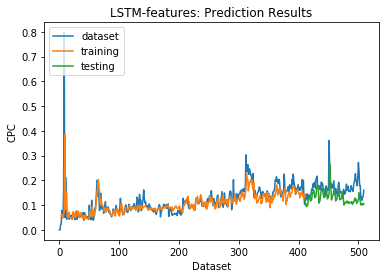

In [27]:
#----------plot the prediction result
# shift train predictions for plotting
train_predict_plot = np.zeros((len_data, 1))
print(time_prediction, train_predict_plot.shape)
train_predict_plot[:train_predict_plot.shape[0], 0] = np.nan
train_predict_plot[skip:len(train_predict)+skip] = train_predict

# shift test predictions for plotting
test_predict_plot = np.zeros((len_data, 1))
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + skip-1:] = test_predict

# plot baseline and predictions
plot_dataset = np.zeros((len_data, 1))
plot_dataset[skip-1:] = y_label
plt.plot(plot_dataset)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.title('LSTM-features: Prediction Results')
plt.ylabel('CPC')
plt.xlabel('Dataset')
plt.legend(['dataset', 'training', 'testing'], loc='upper left')
plt.show()

# Forecasting

Forecasting the CPC for n-days

In [121]:
#--------------forecasting the CPC using LSTM
forecast, inp, predict = np.array([]), .0, .0
adding = time_prediction*7
for i in range(adding):
    if i > 0: inp = np.concatenate([inp[-1, 0, 1:], predict[0] ]).reshape((1, 1,time_prediction-1) )
    else: inp = np.concatenate([trainX[-1, 0, 1:], train_predict[-1]]).reshape((1, 1, time_prediction-1) )
    predict = lstm_model.predict(inp)
    forecast = np.append(forecast, predict)

#get the forecasting's values
forecast = forecast.reshape(int(forecast.shape[0]/14),14)
forecast_result = regression_to_class_forecast(forecast[:,-1]).reshape(-1,1)
print (forecast_result[:,-1])

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.]


In [118]:
def regression_to_class_forecast(inp):
    len_input = len(inp)
    output = np.zeros_like(inp)
    for i in range(1,len_input): output[i] = subtract(inp[i], inp[i-1])
    return output 

In [119]:
test_data = regression_to_class_forecast(testY)
print (np.append(forecast_result[1:8], test_data[1:8], axis =1))

[[ 0.  1.]
 [ 1.  1.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  1.]]
